In [101]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sn

In [102]:
data=pd.read_csv("crime_data.csv")

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
data1=data.drop(['Unnamed: 0'],axis=1) # drop Unnamed column as not required

In [106]:
array=data1.values # convert dataframe into array , as reqruied for standardized function

In [107]:
standard=StandardScaler().fit(array)  # standardized values stored in array variable
x=standard.transform(array)  # convert and store standardized values in variable x

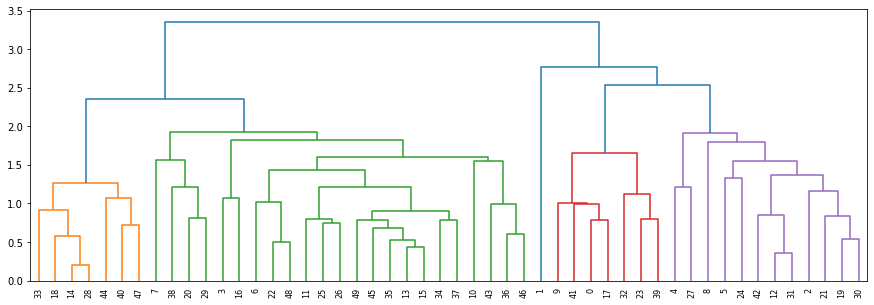

In [108]:
plt.figure(figsize=(15,5))
dendrogram=sch.dendrogram(sch.linkage(x,method='average')) # can use any method out of single,complete,average,centroid


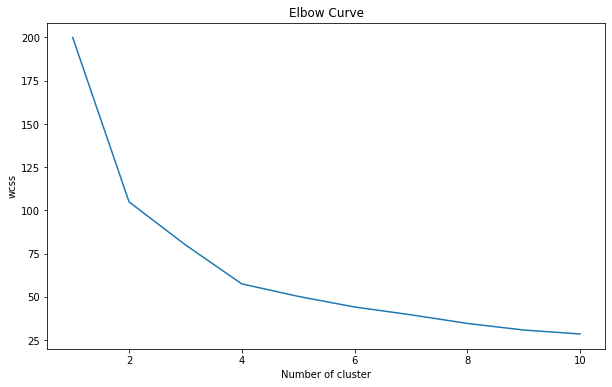

In [109]:
# will identify the number of clusters formed

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

wcss=[]  # calculate within cluster sum of square distance

for i in range (1,11):  # range of no. of K (cluster)
    kmeans = KMeans (n_clusters=i, random_state=0)  # 
    kmeans.fit(x)   # x is normalize value for our data
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()


In [110]:
# 
model=KMeans(n_clusters=6)
model.fit(x)
model.labels_

array([1, 3, 4, 5, 3, 3, 0, 5, 4, 1, 0, 2, 4, 5, 2, 5, 5, 1, 2, 4, 0, 4,
       0, 1, 5, 5, 5, 3, 2, 0, 4, 4, 1, 2, 0, 5, 5, 0, 0, 1, 2, 1, 4, 0,
       2, 5, 0, 2, 2, 5])

In [111]:
md=pd.Series(model.labels_) # converting numpy array into pandas series object
data['Cluster']=md
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,5
8,Florida,15.4,335,80,31.9,4
9,Georgia,17.4,211,60,25.8,1


In [113]:
data.sort_values(by=['Cluster'])

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
38,Rhode Island,3.4,174,87,8.3,0
34,Ohio,7.3,120,75,21.4,0
29,New Jersey,7.4,159,89,18.8,0
6,Connecticut,3.3,110,77,11.1,0
46,Washington,4.0,145,73,26.2,0
22,Minnesota,2.7,72,66,14.9,0
10,Hawaii,5.3,46,83,20.2,0
20,Massachusetts,4.4,149,85,16.3,0
37,Pennsylvania,6.3,106,72,14.9,0
43,Utah,3.2,120,80,22.9,0
